<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-price-action/blob/main/ES_PA_Capi%CC%81tulo_04_Deteccio%CC%81n_de_Figuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Detección de Figuras


<br>


💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [2]:
!pip install yfinance
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [4]:
# El código aquí permitirá cambiar los gráficos a modo oscuro para aquellos que elijan programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams['figure.figsize'] = [20, 8]

# Importar los datos

In [5]:
# Importar los precios de activos desde Yahoo Finance
df = yf.download("GOOG", start="2010-01-01")

# Crear la columna de Fecha para representar los diagrama de vela más adelante(Not mandatory if you don't want to plot the candlestick)
df["Date"] = pd.to_datetime(df.index)
df["Date"] = df["Date"].apply(mpl_dates.date2num)


# Renombrar las columnas
df.columns = ["open", "high", "low", "close", "adj close", "volume", "date"]
df.index.name = "time"

df["Candle way"] = -1
df.loc[(df["open"] - df["close"]) < 0, "Candle way"] = 1
df["amplitude"] = np.abs(df["close"] - df["open"])


df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date,Candle way,amplitude
time,,,,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293,733776.0,-1,0.004981
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494,733777.0,-1,0.079452
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526,733778.0,-1,0.438356
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695,733779.0,-1,0.381072
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313,733780.0,1,0.249565
...,...,...,...,...,...,...,...,...,...
2022-09-09,110.050003,112.000000,110.000000,111.779999,111.779999,21732900,738407.0,1,1.729996
2022-09-12,111.989998,112.639999,110.930000,111.870003,111.870003,19732900,738410.0,-1,0.119995
2022-09-13,108.889999,109.370003,105.000000,105.309998,105.309998,33015000,738411.0,-1,3.580002


# Figura envolvente alcista (Bullish engulfing)

In [6]:
df["Bullish Engulfing"] = np.nan

df.loc[
       # 5 velas decrecientes (rojas) consecutivas y un incremento (verde) en el día actual
       (df["Candle way"].shift(5) == -1) &\
       (df["Candle way"].shift(4) == -1) &\
       (df["Candle way"].shift(3) == -1) &\
       (df["Candle way"].shift(2) == -1) &\
       (df["Candle way"].shift(1) == -1) &\
       (df["Candle way"] == 1) &\
      

       # Valor de cierre de la última vela decreciente = Valor de apertura de la vela de hoy
       (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
       (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\


       # La última vela decreciente es más debil (menor amplitud) que el crecimiento de la vela de hoy (mayor amplitud)
       (df["amplitude"].shift(1)*1.5 < df["amplitude"]), "Bullish Engulfing"] = 1


In [7]:
df["Bullish Engulfing"].dropna()


time
2010-03-01    1.0
2012-01-27    1.0
2013-06-28    1.0
2013-07-30    1.0
2013-08-19    1.0
2015-05-04    1.0
2016-06-23    1.0
2017-04-12    1.0
2018-01-02    1.0
2018-11-15    1.0
Name: Bullish Engulfing, dtype: float64

# Verificación

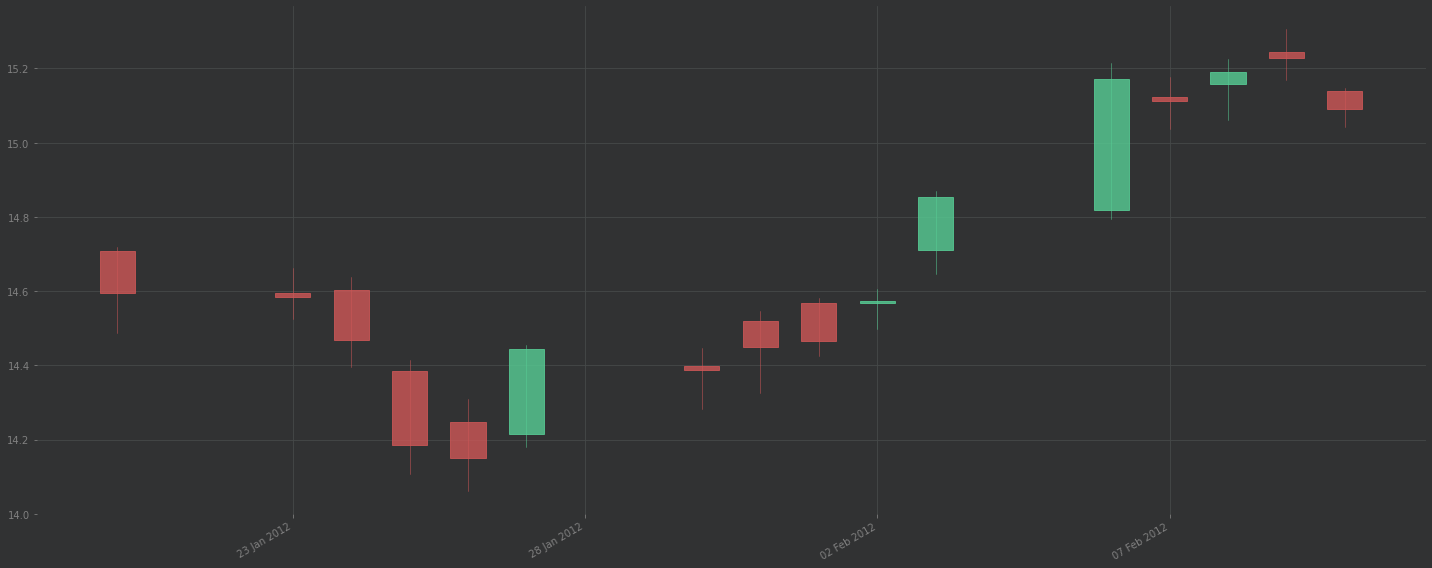

In [8]:
df_bis = df.loc["2012-01-20":"2012-02-10"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Representar el candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Poner la fecha en el eje de las x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()
plt.close()

# Figura Envolvente Bajista (Bearish Engulfing)

In [9]:
df["Bearish Engulfing"] = np.nan

df.loc[
       # 5 velas crecientes (verdes) consecutivas y un decremento (roja) en el día actual
       (df["Candle way"].shift(5) == 1) &\
       (df["Candle way"].shift(4) == 1) &\
       (df["Candle way"].shift(3) == 1) &\
       (df["Candle way"].shift(2) == 1) &\
       (df["Candle way"].shift(1) == 1) &\
       (df["Candle way"] == -1) &\

       # Valor de cierre de la última vela creciente = Valor de apertura de la vela de hoy
       (df["close"].shift(1) < df["open"]*(1+0.5/100)) &\
       (df["close"].shift(1) > df["open"]*(1-0.5/100)) &\

       # La última vela creciente es más debil (menor amplitud) que el decrecimiento de la vela de hoy (mayor amplitud)
       (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bearish Engulfing"] = -1

In [10]:
df["Bearish Engulfing"].dropna()

time
2015-03-06   -1.0
2015-07-23   -1.0
2015-11-09   -1.0
2017-05-31   -1.0
2018-02-22   -1.0
2019-12-11   -1.0
2020-02-20   -1.0
2020-12-09   -1.0
2021-07-15   -1.0
2021-07-27   -1.0
2021-08-26   -1.0
2021-12-28   -1.0
Name: Bearish Engulfing, dtype: float64

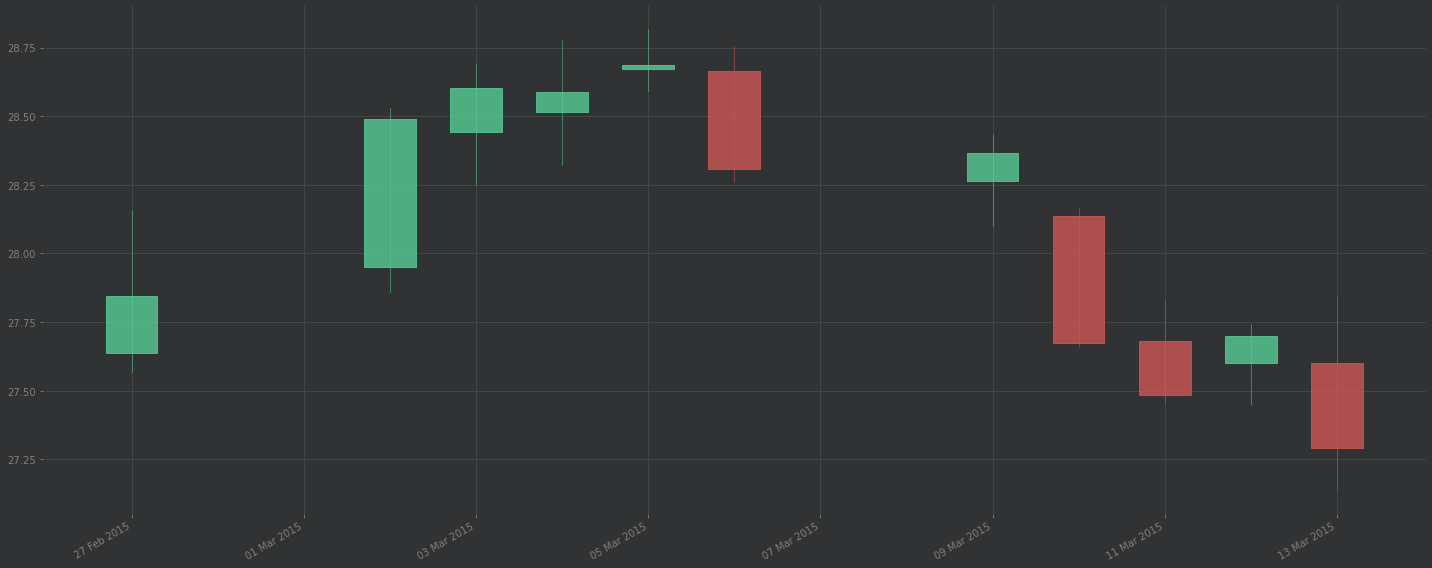

In [11]:
df_bis = df.loc["2015-02-27":"2015-03-15"]

# Inicializar el gráfico
fig, ax = plt.subplots()

# Representar la candlestick
candlestick_ohlc(ax,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, \
                  colorup='#57CE95', colordown='#CE5757', alpha=0.8)

# Colocar la fecha en el eje de las x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Backtest

In [14]:
df["signal"] = df["Bullish Engulfing"].fillna(value=0) + df["Bearish Engulfing"].fillna(value=0)
df["signal"].dropna()

time
2010-01-04    0.0
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
             ... 
2022-09-09    0.0
2022-09-12    0.0
2022-09-13    0.0
2022-09-14    0.0
2022-09-15    0.0
Name: signal, Length: 3198, dtype: float64

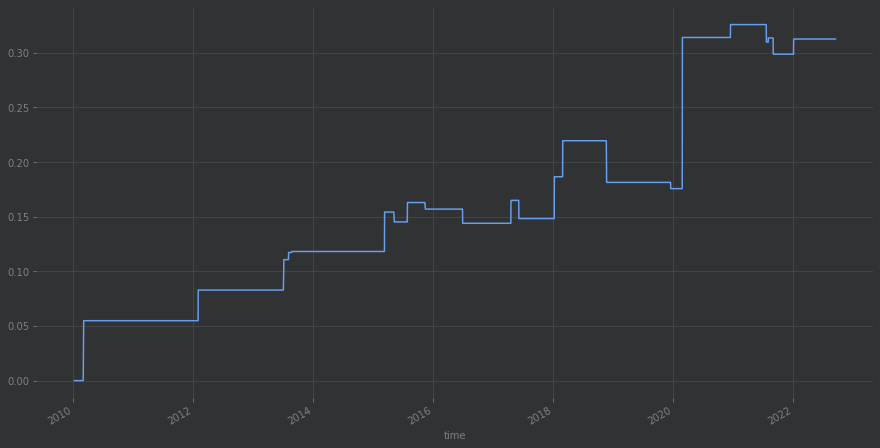

In [21]:
duration = 5

# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular el retorno de la estrategia
#df["return"] = df["signal"].shift(1) * df["pct"].shift(0)
#df["return"] = df["signal"].shift(2) * (df["pct"].shift(0) + df["pct"].shift(1))
df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))


df["return"].cumsum().plot(figsize=(15,8))

In [17]:
duration = 5
pd.DataFrame(np.array([df["pct"].shift(i) for i in range(duration)]))

,0,1,2,3,4,5,6,7,8,9,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,NaN,-0.004404,-0.025209,-0.023280,0.013331,-0.001512,-0.017684,-0.005741,0.004701,-0.016699,...,0.012826,-0.016915,-0.011042,0.027912,-0.009595,0.021568,0.000805,-0.058640,0.005318,-0.015585
1,NaN,NaN,-0.004404,-0.025209,-0.023280,0.013331,-0.001512,-0.017684,-0.005741,0.004701,...,-0.006915,0.012826,-0.016915,-0.011042,0.027912,-0.009595,0.021568,0.000805,-0.058640,0.005318
2,NaN,NaN,NaN,-0.004404,-0.025209,-0.023280,0.013331,-0.001512,-0.017684,-0.005741,...,-0.003897,-0.006915,0.012826,-0.016915,-0.011042,0.027912,-0.009595,0.021568,0.000805,-0.058640
3,NaN,NaN,NaN,NaN,-0.004404,-0.025209,-0.023280,0.013331,-0.001512,-0.017684,...,-0.008625,-0.003897,-0.006915,0.012826,-0.016915,-0.011042,0.027912,-0.009595,0.021568,0.000805
4,NaN,NaN,NaN,NaN,NaN,-0.004404,-0.025209,-0.023280,0.013331,-0.001512,...,-0.054375,-0.008625,-0.003897,-0.006915,0.012826,-0.016915,-0.011042,0.027912,-0.009595,0.021568


# Automatización

In [22]:
def engulfing(symbol, spread=0.5, duration=5):
  # Importar datos financieros de Yahoo Finance
  df = yf.download(symbol, start="2010-01-01")

  # Renombrar las columnas
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  df["Candle way"] = -1
  df.loc[(df["open"] - df["close"]) < 0, "Candle way"] = 1
  df["amplitude"] = np.abs(df["close"] - df["open"])


  df["Bullish Engulfing"] = np.nan

  df.loc[
      # 5 velas decrecientes (rojas) consecutivas y un incremento (verde) en el día actual
      (df["Candle way"].shift(5) == -1) &\
      (df["Candle way"].shift(4) == -1) &\
      (df["Candle way"].shift(3) == -1) &\
      (df["Candle way"].shift(2) == -1) &\
      (df["Candle way"].shift(1) == -1) &\
      (df["Candle way"] == 1) &\

      # Valor de cierre de la última vela decreciente = Valor de apertura de la vela de hoy
      (df["close"].shift(1) < df["open"]*(1+spread/100)) &\
      (df["close"].shift(1) > df["open"]*(1-spread/100)) &\

      # La última vela decreciente es más debil (menor amplitud) que el crecimiento de la vela de hoy (mayor amplitud)
      (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bullish Engulfing"] = 1


  df["Bearish Engulfing"] = np.nan

  df.loc[
       # 5 velas crecientes (verdes) consecutivas y un decremento (roja) en el día actual
      (df["Candle way"].shift(5) == 1) &\
      (df["Candle way"].shift(4) == 1) &\
      (df["Candle way"].shift(3) == 1) &\
      (df["Candle way"].shift(2) == 1) &\
      (df["Candle way"].shift(1) == 1) &\
      (df["Candle way"] == -1) &\

      # Valor de cierre de la última vela creciente = Valor de apertura de la vela de hoy
      (df["close"].shift(1) < df["open"]*(1+spread/100)) &\
      (df["close"].shift(1) > df["open"]*(1-spread/100)) &\

      # La última vela creciente es más debil (menor amplitud) que el decrecimiento de la vela de hoy (mayor amplitud)
      (df["amplitude"].shift(1) * 1.5< df["amplitude"]), "Bearish Engulfing"] = -1

  df["signal"] = df["Bullish Engulfing"].fillna(value=0) + df["Bearish Engulfing"].fillna(value=0)

  # Calcular el porcentaje de variación del activo
  df["pct"] = df["close"].pct_change(1)

  # Calcular el retorno de la estrategia
  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["signal"].shift(duration))

  return df["return"]

[*********************100%***********************]  1 of 1 completed


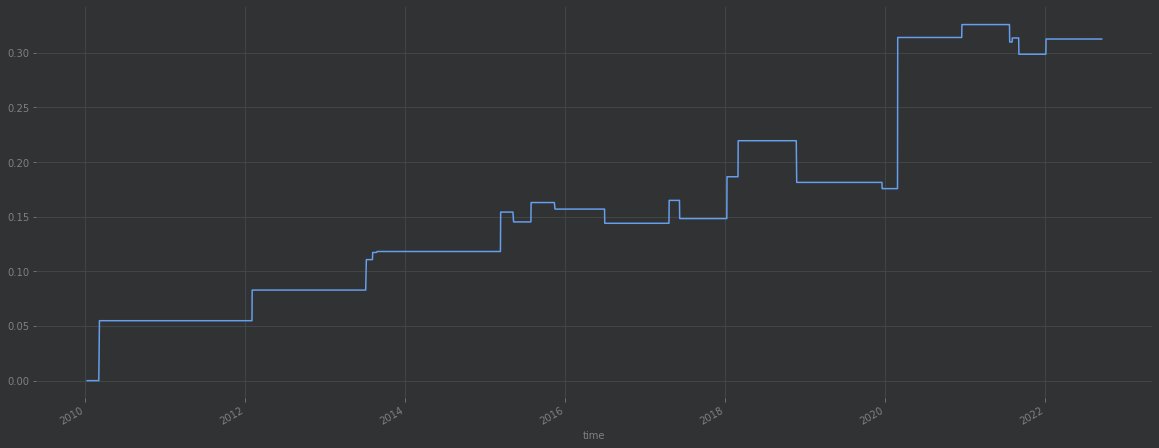

In [23]:
engulfing("GOOG").cumsum().plot()

[*********************100%***********************]  1 of 1 completed


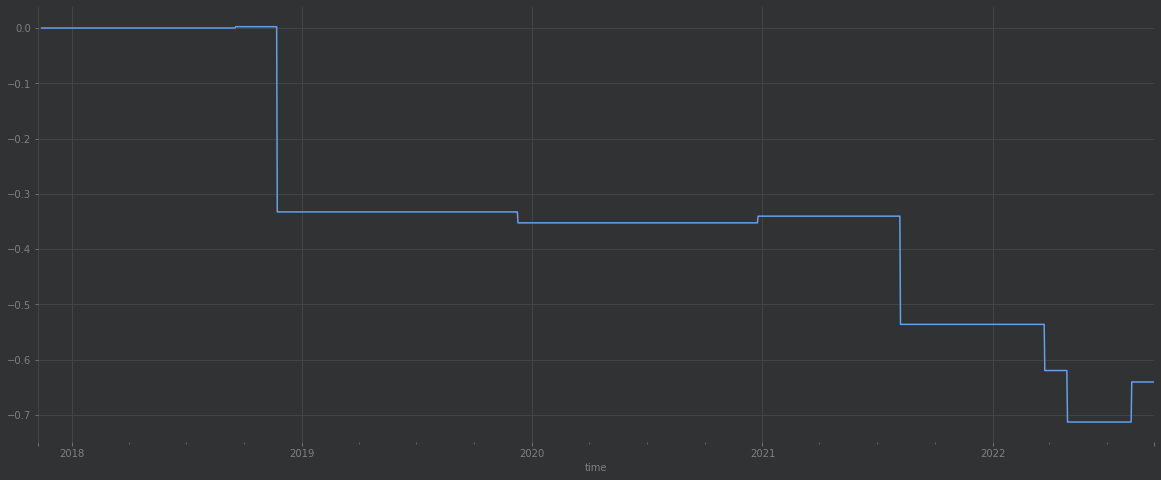

In [24]:
engulfing("ETH-USD").cumsum().plot()

[*********************100%***********************]  1 of 1 completed


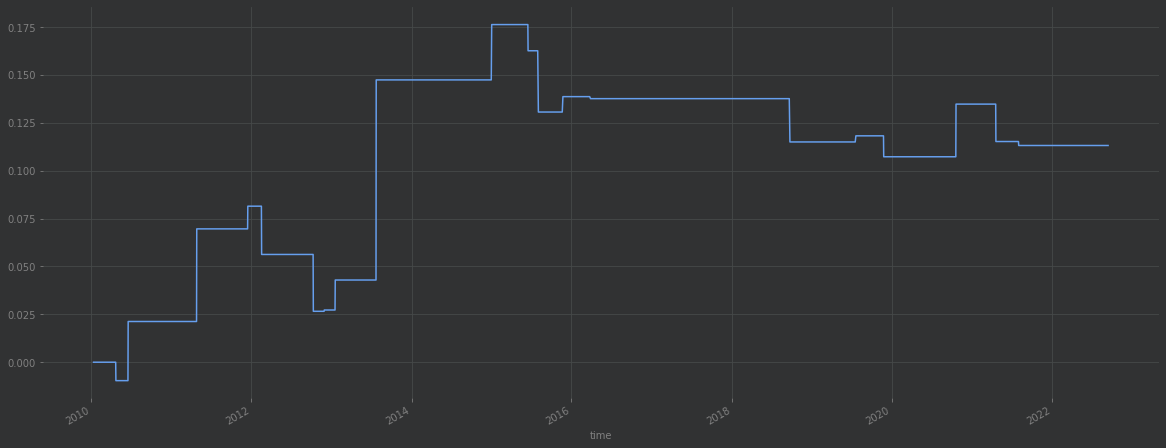

In [25]:
engulfing("MSFT").cumsum().plot()